**Project Title: Unmanned Aerial Vehicle(UAV) for Intrusion Detection dataset**

**APPROACH 1**

Do binary classification of the combined(unidir + bidir) dataset for features 4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17.

Classification using:-
1. Logistic Regression
2. KNN
3. LDA
4. Decision Tree
5. Bagging
6. Random Forest
7. Boosting
8. SVM
9. QDA

In [1]:
#importing libraries 
import pickle
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

import pandas as pd
import numpy as np
import h5py
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading data from pickle file 
pickle_in = open("X_train_App1.pickle","rb")
X_training= pickle.load(pickle_in)

pickle_in = open("y_train_App1.pickle","rb")
y_training = pickle.load(pickle_in)

pickle_in = open("X_test_App1.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test_App1.pickle","rb")
y_test = pickle.load(pickle_in)

In [3]:
print('X_training :', X_training.shape)
print('y_training :', y_training.shape)
print('X_test :', X_test.shape)
print('y_test :', y_test.shape)

X_training : (6241, 11)
y_training : (6241,)
X_test : (62495, 11)
y_test : (62495,)


In [4]:
#Splitting of training data into trian and validation set 
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.2, random_state=1)

In [5]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)
print('X_val :',X_val.shape)
print('y_val :',y_val.shape)

X_train : (4992, 11)
y_train : (4992,)
X_val : (1249, 11)
y_val : (1249,)


***1. Logistic Regression***

In [10]:
#Training using logistic regression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

Validation Performance:
Accuracy: 0.8542834267413931 , Misclassification error: 0.14571657325860687
Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       617
         1.0       0.89      0.81      0.85       632

    accuracy                           0.85      1249
   macro avg       0.86      0.85      0.85      1249
weighted avg       0.86      0.85      0.85      1249


Confusion matrix:
[[552  65]
 [117 515]]


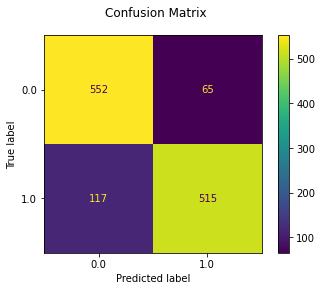

In [74]:
print('Validation Performance:')
y_pred = clf.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(clf, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 0.8543669871794872 , Misclassification error: 0.14563301282051277
Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      2366
         1.0       0.90      0.82      0.86      2626

    accuracy                           0.85      4992
   macro avg       0.86      0.86      0.85      4992
weighted avg       0.86      0.85      0.85      4992


Confusion matrix:
[[2121  245]
 [ 482 2144]]


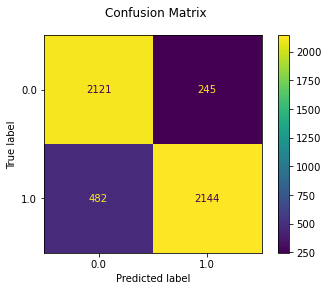

In [75]:
print('Training Performance:')
y_train_pred = clf.predict(X_train) #prediction for Training dataset 
acc = accuracy_score(y_train, y_train_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_train, y_train_pred)}\n")

disp = metrics.plot_confusion_matrix(clf, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.8595407632610609 , Test Misclassification error: 0.14563301282051277
Testdata Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     29466
         1.0       0.91      0.82      0.86     33029

    accuracy                           0.86     62495
   macro avg       0.86      0.86      0.86     62495
weighted avg       0.86      0.86      0.86     62495


Testdata Confusion matrix:
[[26676  2790]
 [ 5988 27041]]


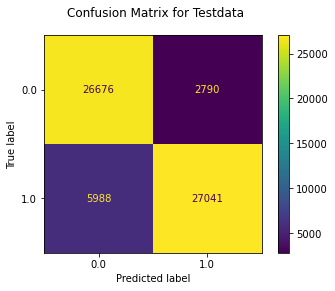

In [76]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()


***2. K-Nearest Neighbors (KNN)***

In [80]:
neigh = KNeighborsClassifier(n_neighbors=3) #Initializing K-Nearest Neighbhors with K = 3
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       617
         1.0       1.00      1.00      1.00       632

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249


Confusion matrix:
[[617   0]
 [  0 632]]


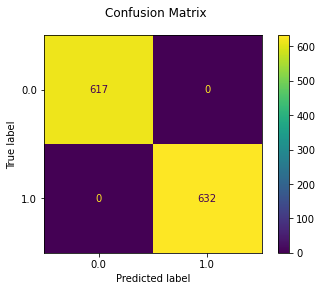

In [81]:
print('Validation Performance:')
y_pred = neigh.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(neigh, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 0.9997996794871795 , Misclassification error: 0.00020032051282048435
Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2366
         1.0       1.00      1.00      1.00      2626

    accuracy                           1.00      4992
   macro avg       1.00      1.00      1.00      4992
weighted avg       1.00      1.00      1.00      4992


Confusion matrix:
[[2366    0]
 [   1 2625]]


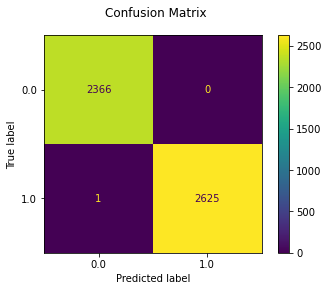

In [82]:
print('Training Performance:')
y_train_pred = neigh.predict(X_train) #prediction for Training dataset 
acc = accuracy_score(y_train, y_train_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_train, y_train_pred)}\n")

disp = metrics.plot_confusion_matrix(neigh, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9987679014321146 , Test Misclassification error: 0.00020032051282048435
Testdata Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29466
         1.0       1.00      1.00      1.00     33029

    accuracy                           1.00     62495
   macro avg       1.00      1.00      1.00     62495
weighted avg       1.00      1.00      1.00     62495


Testdata Confusion matrix:
[[29396    70]
 [    7 33022]]


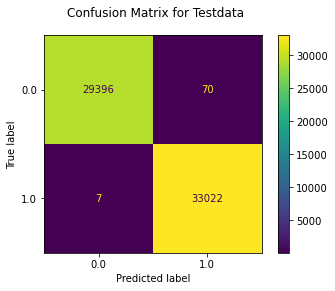

In [83]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = neigh.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(neigh, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()


***3. Linear Discriminant Analysis (LDA)***

In [84]:
lda = LinearDiscriminantAnalysis(solver='svd') #Initializing LDA

Validation Performance:
Accuracy: 0.9359487590072058 , Misclassification error: 0.06405124099279424
Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93       617
         1.0       0.89      1.00      0.94       632

    accuracy                           0.94      1249
   macro avg       0.94      0.94      0.94      1249
weighted avg       0.94      0.94      0.94      1249


Confusion matrix:
[[538  79]
 [  1 631]]


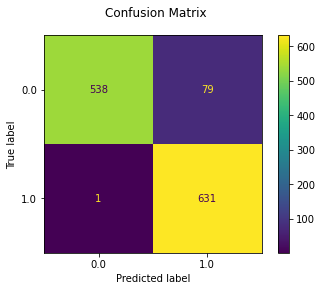

In [85]:
print('Validation Performance:')
y_pred = lda.fit(X_train, y_train).predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(lda, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 0.9338942307692307 , Misclassification error: 0.06610576923076927
Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      2366
         1.0       0.89      0.99      0.94      2626

    accuracy                           0.93      4992
   macro avg       0.94      0.93      0.93      4992
weighted avg       0.94      0.93      0.93      4992


Confusion matrix:
[[2051  315]
 [  15 2611]]


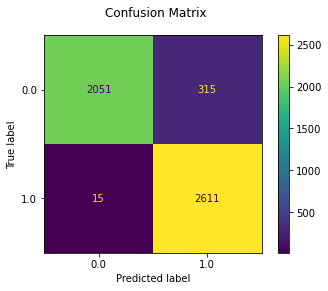

In [86]:
print('Training Performance:')
ytrain_pred = lda.fit(X_train, y_train).predict(X_train) #prediction for Training dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(lda, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9357068565485239 , Test Misclassification error: 0.06610576923076927
Testdata Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     29466
         1.0       0.90      0.99      0.94     33029

    accuracy                           0.94     62495
   macro avg       0.94      0.93      0.93     62495
weighted avg       0.94      0.94      0.94     62495


Testdata Confusion matrix:
[[25652  3814]
 [  204 32825]]


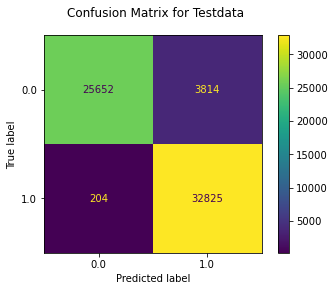

In [87]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = lda.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(lda, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

***4. Decision Tree***

In [89]:
DTclf = DecisionTreeClassifier(random_state=0) #Initializing decision tree
DTclf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

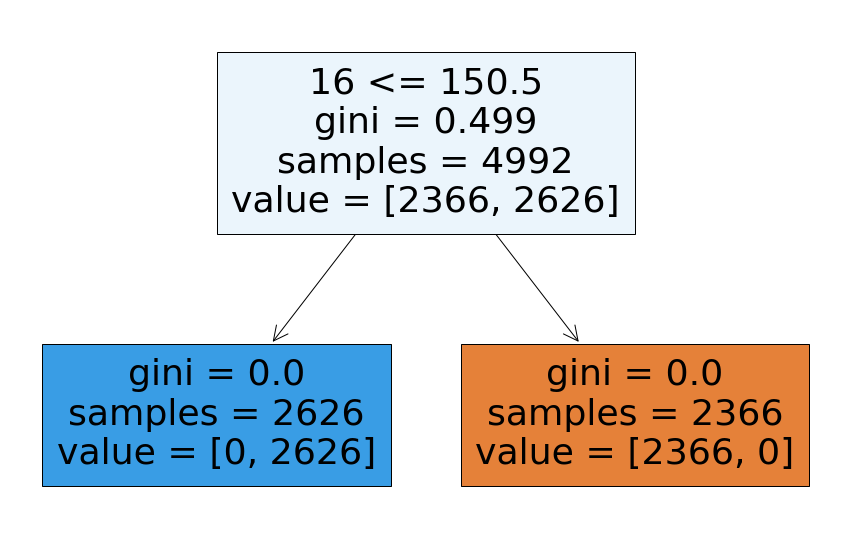

In [90]:
#Visualising decision tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(DTclf, feature_names=X_training.columns, filled=True)

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       617
         1.0       1.00      1.00      1.00       632

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249


Confusion matrix:
[[617   0]
 [  0 632]]


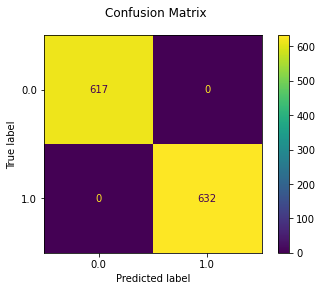

In [91]:
print('Validation Performance:')
y_pred = DTclf.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {DTclf}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(DTclf, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2366
         1.0       1.00      1.00      1.00      2626

    accuracy                           1.00      4992
   macro avg       1.00      1.00      1.00      4992
weighted avg       1.00      1.00      1.00      4992


Confusion matrix:
[[2366    0]
 [   0 2626]]


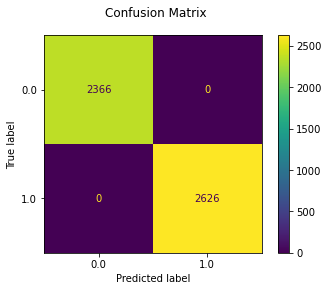

In [92]:
print('Training Performance:')
ytrain_pred = DTclf.predict(X_train) #prediction for train dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {DTclf}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(DTclf, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 1.0 , Test Misclassification error: 0.0
Testdata Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29466
         1.0       1.00      1.00      1.00     33029

    accuracy                           1.00     62495
   macro avg       1.00      1.00      1.00     62495
weighted avg       1.00      1.00      1.00     62495


Testdata Confusion matrix:
[[29466     0]
 [    0 33029]]


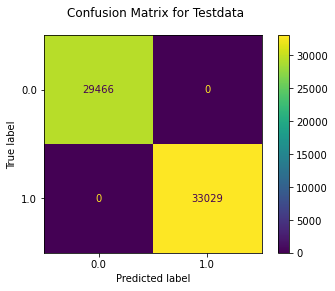

In [93]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = DTclf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {DTclf}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(DTclf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

***5. Bagging***

In [94]:
#Bagging = Random forest with complete features 
bgclf = RandomForestClassifier(max_features=11, random_state=1)   
bgclf.fit(X_train, y_train)

RandomForestClassifier(max_features=11, random_state=1)

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for Bagging classifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       617
         1.0       1.00      1.00      1.00       632

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249


Confusion matrix:
[[617   0]
 [  0 632]]


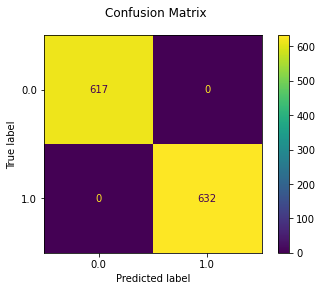

In [95]:
print('Validation Performance:')
y_pred = bgclf.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for Bagging classifier:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(bgclf, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for Bagging classifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2366
         1.0       1.00      1.00      1.00      2626

    accuracy                           1.00      4992
   macro avg       1.00      1.00      1.00      4992
weighted avg       1.00      1.00      1.00      4992


Confusion matrix:
[[2366    0]
 [   0 2626]]


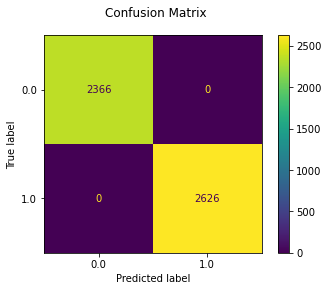

In [96]:
print('Training Performance:')
ytrain_pred = bgclf.predict(X_train) #prediction for train dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for Bagging classifier:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(bgclf, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 1.0 , Test Misclassification error: 0.0
Testdata Classification report for bagging classifier :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29466
         1.0       1.00      1.00      1.00     33029

    accuracy                           1.00     62495
   macro avg       1.00      1.00      1.00     62495
weighted avg       1.00      1.00      1.00     62495


Testdata Confusion matrix:
[[29466     0]
 [    0 33029]]


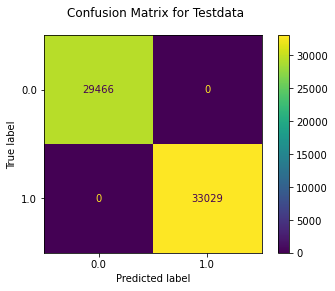

In [97]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = bgclf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for bagging classifier :\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(bgclf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

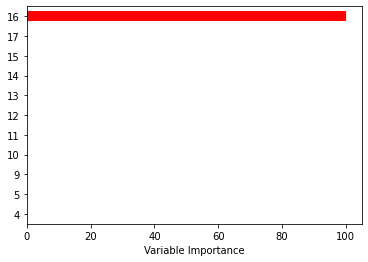

In [105]:
Importance = pd.DataFrame({'Importance':bgclf.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

***6. Random Forest***

In [99]:
RFclf = RandomForestClassifier(max_features=4, random_state=1)   #m = sqrt(p); m = sqrt(11) ~ 4
RFclf.fit(X_train, y_train)

RandomForestClassifier(max_features=4, random_state=1)

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier RandomForestClassifier(max_features=4, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       617
         1.0       1.00      1.00      1.00       632

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249


Confusion matrix:
[[617   0]
 [  0 632]]


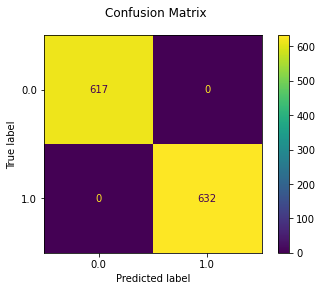

In [100]:
print('Validation Performance:')
y_pred = RFclf.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {RFclf}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(RFclf, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier RandomForestClassifier(max_features=4, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2366
         1.0       1.00      1.00      1.00      2626

    accuracy                           1.00      4992
   macro avg       1.00      1.00      1.00      4992
weighted avg       1.00      1.00      1.00      4992


Confusion matrix:
[[2366    0]
 [   0 2626]]


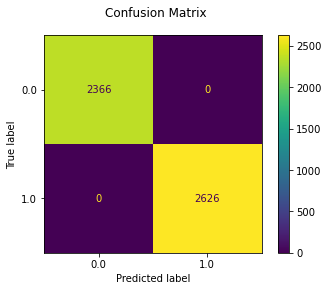

In [101]:
print('Training Performance:')
ytrain_pred = RFclf.predict(X_train) #prediction for train dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {RFclf}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(RFclf, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 1.0 , Test Misclassification error: 0.0
Testdata Classification report for classifier RandomForestClassifier(max_features=4, random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29466
         1.0       1.00      1.00      1.00     33029

    accuracy                           1.00     62495
   macro avg       1.00      1.00      1.00     62495
weighted avg       1.00      1.00      1.00     62495


Testdata Confusion matrix:
[[29466     0]
 [    0 33029]]


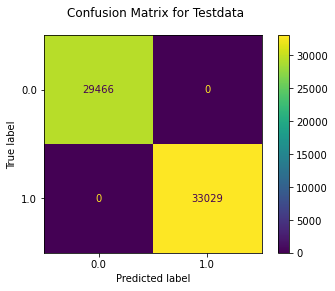

In [102]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = RFclf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {RFclf}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(RFclf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

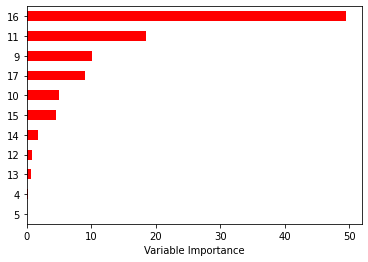

In [104]:
#Variable Importance for better interpretation 
Importance = pd.DataFrame({'Importance':RFclf.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

***6. Boosting***

In [116]:
boostclass = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, random_state=1)#Initializing boosting algorith
boostclass.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1)

12    7.064700e-14
11    9.071514e-14
15    1.321570e-13
13    4.471377e-13
17    5.269636e-13
9     5.641585e-13
14    6.342901e-13
10    6.707044e-13
4     6.745590e-13
5     8.142563e-13
16    1.000000e+02
dtype: float64


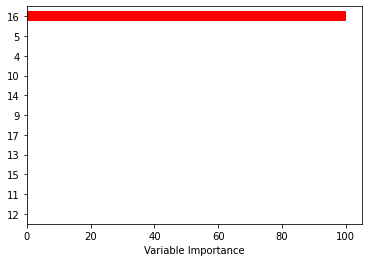

In [117]:
#Visualising the important features
feature_importance = boostclass.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X_train.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       617
         1.0       1.00      1.00      1.00       632

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249


Confusion matrix:
[[617   0]
 [  0 632]]


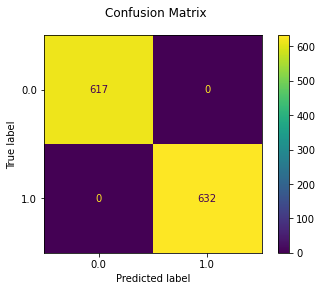

In [118]:
print('Validation Performance:')
y_pred = boostclass.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2366
         1.0       1.00      1.00      1.00      2626

    accuracy                           1.00      4992
   macro avg       1.00      1.00      1.00      4992
weighted avg       1.00      1.00      1.00      4992


Confusion matrix:
[[2366    0]
 [   0 2626]]


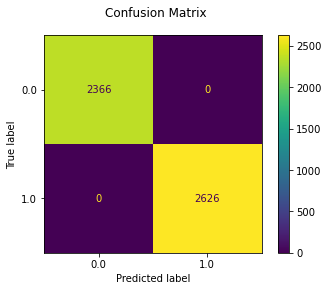

In [119]:
print('Training Performance:')
ytrain_pred = boostclass.predict(X_train) #prediction for train dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 1.0 , Test Misclassification error: 0.0
Testdata Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29466
         1.0       1.00      1.00      1.00     33029

    accuracy                           1.00     62495
   macro avg       1.00      1.00      1.00     62495
weighted avg       1.00      1.00      1.00     62495


Testdata Confusion matrix:
[[29466     0]
 [    0 33029]]


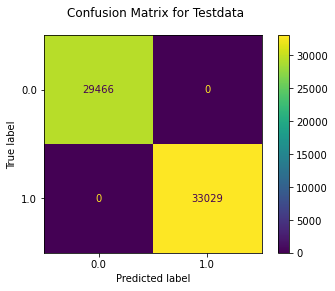

In [120]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = boostclass.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

***8. Support Vector Machine (SVM)***

In [121]:
# https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
svc = svm.SVC(kernel='linear', C=1, gamma='auto').fit(X_train, y_train)

Validation Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier SVC(C=1, gamma='auto', kernel='linear'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       617
         1.0       1.00      1.00      1.00       632

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249


Confusion matrix:
[[617   0]
 [  0 632]]


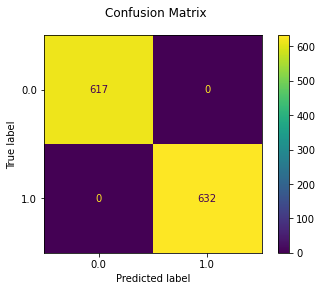

In [122]:
print('Validation Performance:')
y_pred = svc.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {svc}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(svc, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 1.0 , Misclassification error: 0.0
Classification report for classifier SVC(C=1, gamma='auto', kernel='linear'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2366
         1.0       1.00      1.00      1.00      2626

    accuracy                           1.00      4992
   macro avg       1.00      1.00      1.00      4992
weighted avg       1.00      1.00      1.00      4992


Confusion matrix:
[[2366    0]
 [   0 2626]]


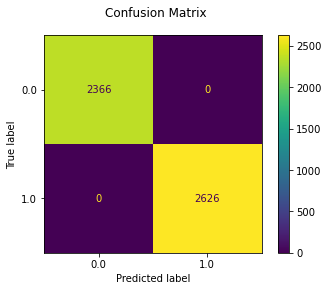

In [123]:
print('Training Performance:')
ytrain_pred = svc.predict(X_train) #prediction for train dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {svc}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(svc, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9999679974397951 , Test Misclassification error: 0.0
Testdata Classification report for classifier SVC(C=1, gamma='auto', kernel='linear'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29466
         1.0       1.00      1.00      1.00     33029

    accuracy                           1.00     62495
   macro avg       1.00      1.00      1.00     62495
weighted avg       1.00      1.00      1.00     62495


Testdata Confusion matrix:
[[29465     1]
 [    1 33028]]


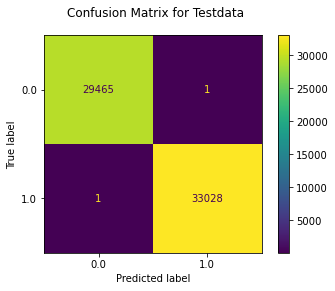

In [124]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {svc}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(svc, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

#### 9. QDA(Quadratic Discriminant Analysis )

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

Validation Performance:
Accuracy: 0.988791032826261 , Misclassification error: 0.011208967173738982
Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       617
         1.0       1.00      0.98      0.99       632

    accuracy                           0.99      1249
   macro avg       0.99      0.99      0.99      1249
weighted avg       0.99      0.99      0.99      1249


Confusion matrix:
[[617   0]
 [ 14 618]]


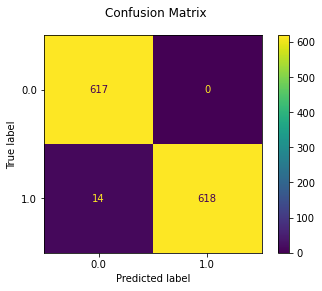

In [8]:
print('Validation Performance:')
y_pred = qda.fit(X_train, y_train).predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(qda, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Training Performance:
Accuracy: 0.9845753205128205 , Misclassification error: 0.015424679487179516
Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2366
         1.0       1.00      0.97      0.99      2626

    accuracy                           0.98      4992
   macro avg       0.98      0.99      0.98      4992
weighted avg       0.99      0.98      0.98      4992


Confusion matrix:
[[2366    0]
 [  77 2549]]


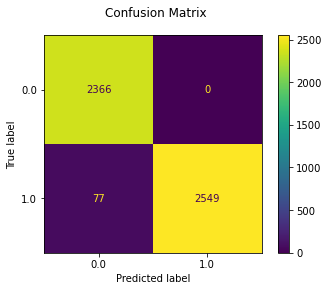

In [9]:
print('Training Performance:')
ytrain_pred = qda.fit(X_train, y_train).predict(X_train) #prediction for validation dataset 
acc = accuracy_score(y_train, ytrain_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

disp = metrics.plot_confusion_matrix(qda, X_train, y_train)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9862869029522362 , Test Misclassification error: 0.015424679487179516
Testdata Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     29466
         1.0       1.00      0.97      0.99     33029

    accuracy                           0.99     62495
   macro avg       0.99      0.99      0.99     62495
weighted avg       0.99      0.99      0.99     62495


Testdata Confusion matrix:
[[29466     0]
 [  857 32172]]


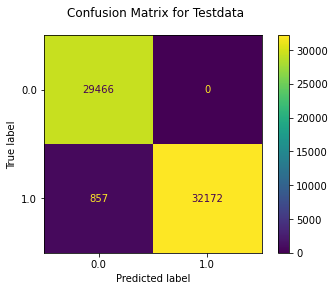

In [10]:
#Predicting the test data 
print('Test Performance:')
y_pred_test = qda.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(qda, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()